<a href="https://colab.research.google.com/github/BeatrizA2/Projeto-Clustering/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######INICIALIZANDO BIBLIOTECAS

In [298]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import random
from sklearn.neighbors import NearestNeighbors



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Pegando dados de `wine.data`

In [299]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                 header = None)
target = data.iloc[:,0:1]
df = data.iloc[:,1:]

Normalização

In [300]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

PCA

In [301]:
df = np.asarray(df)
pca_df = PCA(n_components = 3, random_state = 24)
pca_df = pca_df.fit_transform(df)

PLOT INICIAL

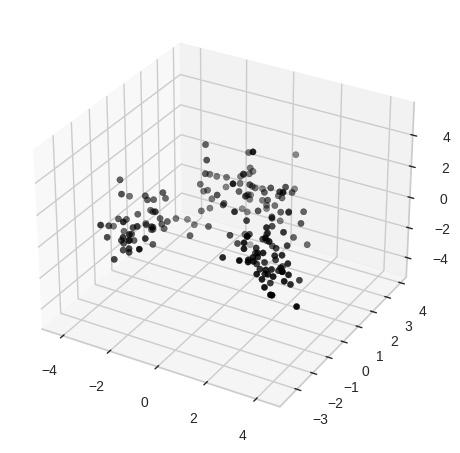

In [302]:
ax = plt.axes(projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = 'black')

Calculo `optimal_k`

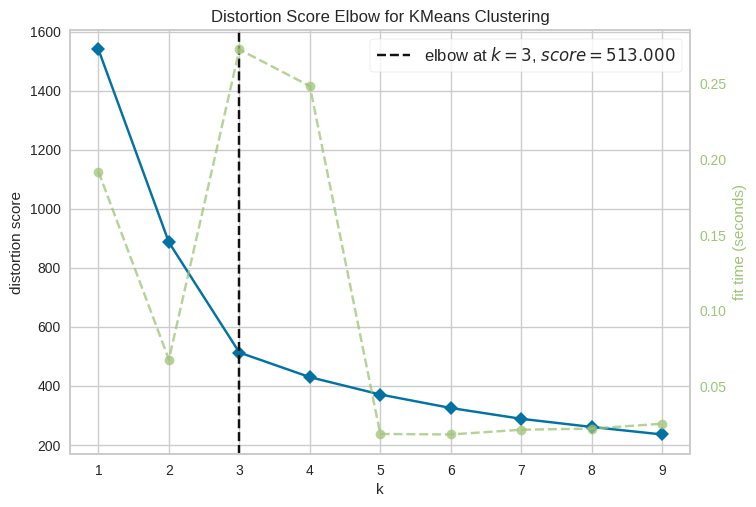

In [303]:
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(pca_df) 
visualizer.poof()
optimal_k = visualizer.elbow_value_

Aplicando kmeans na df

In [304]:
kmeans = KMeans(n_clusters = optimal_k, n_init = 10)
kmeans.fit(pca_df)
cluster_labels = kmeans.fit_predict(pca_df)


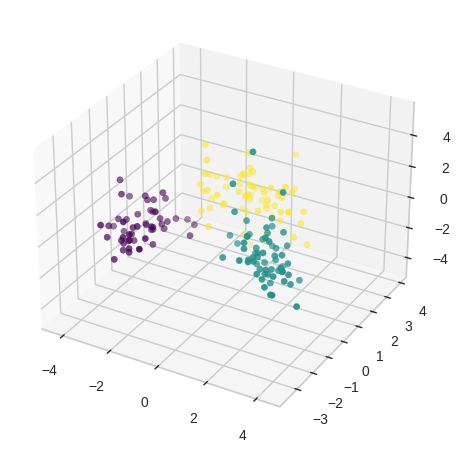

In [305]:
ax = plt.axes(projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = cluster_labels, cmap='viridis')

calculando silhouette score e purity score

In [306]:
ss_kmeans = metrics.silhouette_score(pca_df, cluster_labels)

In [307]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

ps_kmeans = purity_score(target, cluster_labels)

Aplicando Kmedoids

In [308]:
kmedoids = KMedoids(n_clusters=optimal_k)
kmedoids.fit(pca_df)
medoids = kmedoids.cluster_centers_
labels = kmedoids.labels_

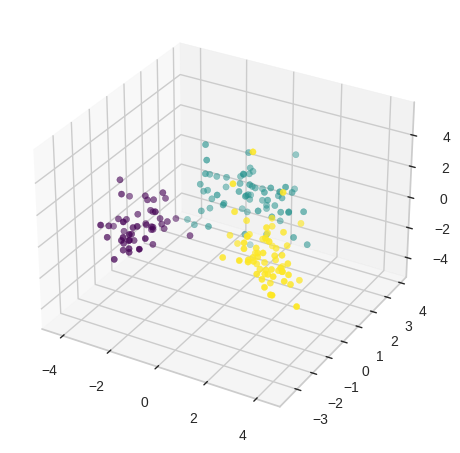

In [309]:
ax = plt.axes(projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = labels, cmap='viridis')

ss e ps

In [310]:
ss_kmedoids = metrics.silhouette_score(df, labels)

In [311]:
ps_kmedoids = purity_score(target, labels)

# DBSCAN

Antes de tudo é necessário calcular o valor de **`epsilon`**

In [312]:
def epsilon():
    
    # --- Calculate Nearest Neighbors ---
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(pca_df)
    distances, indices=nbrs.kneighbors(pca_df)
    distances=np.sort(distances, axis = 0)
    distances_1=distances[:, 1]
    
    plt.plot(distances_1)

##Pegamos o ponto máximo da curvatura para `epsilon`

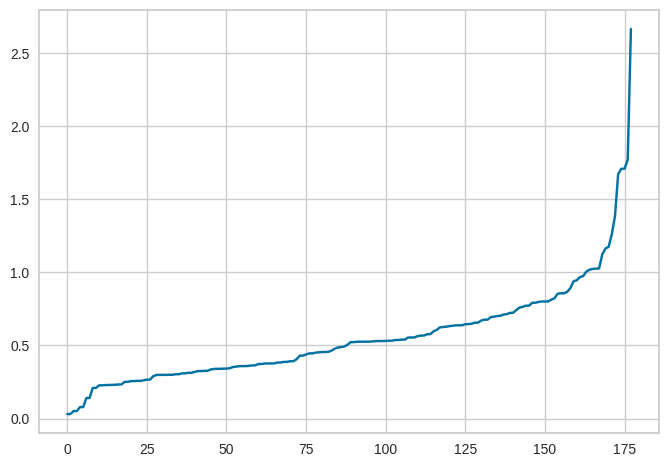

In [313]:
epsilon()

##DBSCAN para `eps = 1`

In [314]:
dbscan = DBSCAN(eps=1)
y_dbscan = dbscan.fit_predict(pca_df)

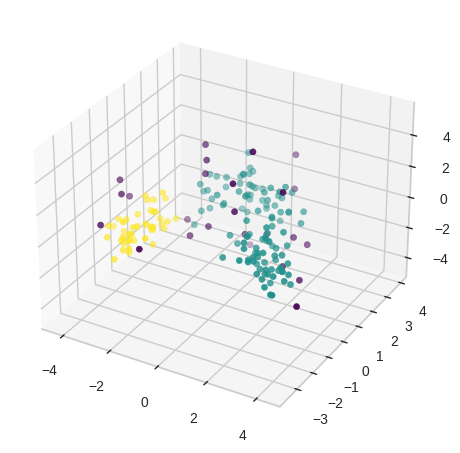

In [315]:
ax = plt.axes(projection='3d')
ax.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = y_dbscan, cmap='viridis')

ss e ps

In [316]:
ss_dbscan = metrics.silhouette_score(df, y_dbscan)

In [317]:
ps_dbscan = purity_score(target, y_dbscan)

#**COMPARAÇÕES ENTRE MODELS**

In [318]:
compare = pd.DataFrame({'Model': ['K-Means', 'K-Medoids', 'DBSCAN'], 
                        'Silhouette Score': [ss_kmeans, ss_kmedoids, ss_dbscan],
                        'Purity Score' : [ps_kmeans, ps_kmedoids, ps_dbscan]
                        })

compare.head()

,Model,Silhouette Score,Purity Score
0,K-Means,0.453800,0.966292
1,K-Medoids,0.282760,0.966292
2,DBSCAN,0.194223,0.629213


//off
*Ao comparar o desempenho dos métodos, é constatado que o K-Means tem um desempenho geral mais consistente para o dataset proposto*